In [32]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import logging
import os
warnings.filterwarnings("ignore")

In [33]:
# Create a logs directory if it doesn't exist
log_dir = 'logger'
if not os.path.exists(log_dir):
    os.makedirs(log_dir)

# Configure the logger
logging.basicConfig(
    filename=os.path.join(log_dir, 'app.log'),
    level=logging.DEBUG,
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s'
)

logger = logging.getLogger(__name__)


In [34]:
# Reading the data.
df= pd.read_csv(r"C:\Users\ravit\Desktop\final one\Dataset\German_credit.csv")

In [35]:
logger.info('Reading file......')

In [36]:
df.shape

(1000, 21)

In [37]:
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [38]:
# Changing the Columns Name, it is useful if the columns are not replaced before.If replace already then you can ignore.
columns =['status','duration','credit_history','purpose','amount','savings','employment_duration',
          'installment_rate','personal_status_sex','other_debtors','present_residence','property',
          'age','other_installment_plans','housing','number_credits','job','people_liable','telephone',
          'foreign_worker','credit_risk']
df.columns = columns
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [39]:
df_updates=df
df_updates.columns

Index(['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker', 'credit_risk'],
      dtype='object')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   1000 non-null   int64
 1   duration                 1000 non-null   int64
 2   credit_history           1000 non-null   int64
 3   purpose                  1000 non-null   int64
 4   amount                   1000 non-null   int64
 5   savings                  1000 non-null   int64
 6   employment_duration      1000 non-null   int64
 7   installment_rate         1000 non-null   int64
 8   personal_status_sex      1000 non-null   int64
 9   other_debtors            1000 non-null   int64
 10  present_residence        1000 non-null   int64
 11  property                 1000 non-null   int64
 12  age                      1000 non-null   int64
 13  other_installment_plans  1000 non-null   int64
 14  housing                  1000 non-null   int64
 15  numbe

# Replacing the numerical values with original values in all categorical columns..

$`laufkont = status`
                                               
 1 : no checking account                       
 2 : ... < 0 DM                                
 3 : 0<= ... < 200 DM                          
 4 : ... >= 200 DM / salary for at least 1 year

$`laufzeit = duration`
     

$`moral = credit_history`
                                                
 0 : delay in paying off in the past            
 1 : critical account/other credits elsewhere   
 2 : no credits taken/all credits paid back duly
 3 : existing credits paid back duly till now   
 4 : all credits at this bank paid back duly    

$`verw = purpose`
                        
 0 : others             
 1 : car (new)          
 2 : car (used)         
 3 : furniture/equipment
 4 : radio/television   
 5 : domestic appliances
 6 : repairs            
 7 : education          
 8 : vacation           
 9 : retraining         
 10 : business          

$`hoehe = amount`
     

$`sparkont = savings`
                               
 1 : unknown/no savings account
 2 : ... <  100 DM             
 3 : 100 <= ... <  500 DM      
 4 : 500 <= ... < 1000 DM      
 5 : ... >= 1000 DM            

$`beszeit = employment_duration`
                     
 1 : unemployed      
 2 : < 1 yr          
 3 : 1 <= ... < 4 yrs
 4 : 4 <= ... < 7 yrs
 5 : >= 7 yrs        

$`rate = installment_rate`
                   
 1 : >= 35         
 2 : 25 <= ... < 35
 3 : 20 <= ... < 25
 4 : < 20          

$`famges = personal_status_sex`
                                         
 1 : male : divorced/separated           
 2 : female : non-single or male : single
 3 : male : married/widowed              
 4 : female : single                     

$`buerge = other_debtors`
                 
 1 : none        
 2 : co-applicant
 3 : guarantor   

$`wohnzeit = present_residence`
                     
 1 : < 1 yr          
 2 : 1 <= ... < 4 yrs
 3 : 4 <= ... < 7 yrs
 4 : >= 7 yrs        

$`verm = property`
                                              
 1 : unknown / no property                    
 2 : car or other                             
 3 : building soc. savings agr./life insurance
 4 : real estate                              

$`alter = age`
     

$`weitkred = other_installment_plans`
           
 1 : bank  
 2 : stores
 3 : none  

$`wohn = housing`
             
 1 : for free
 2 : rent    
 3 : own     

$`bishkred = number_credits`
         
 1 : 1   
 2 : 2-3 
 3 : 4-5 
 4 : >= 6

$`beruf = job`
                                               
 1 : unemployed/unskilled - non-resident       
 2 : unskilled - resident                      
 3 : skilled employee/official                 
 4 : manager/self-empl./highly qualif. employee

$`pers = people_liable`
              
 1 : 3 or more
 2 : 0 to 2   

$`telef = telephone`
                              
 1 : no                       
 2 : yes (under customer name)

$`gastarb = foreign_worker`
        
 1 : yes
 2 : no 

$`kredit = credit_risk`
         
 0 : bad 
 1 : good


In [41]:
status = {1:'no checking account', 2:'less than 0 DM', 3:'0 to 200 DM', 4:'200 DM or more'}
df['status'] = df['status'].map(status)

credit_history = {0 : 'delay in paying off in the past',       
 1 : 'critical account/other credits elsewhere',   
 2 : 'no credits taken/all credits paid back duly',
 3 : 'existing credits paid back duly till now',
 4 : 'all credits at this bank paid back duly'}
df['credit_history'] = df['credit_history'].map(credit_history)

purpose = {0 : 'others', 1 : 'car (new)', 2 : 'car (used)',3 : 'furniture/equipment', 4 : 'radio/television', 
           5 : 'domestic appliances', 6 : 'repairs', 7 : 'education', 8 : 'vacation', 9 : 'retraining', 10 : 'business'}
df['purpose'] = df['purpose'].map(purpose)

savings = {1:'unknown/no savings account', 2 :'less than 100 DM', 3:'100 to 500 DM', 4 :'500 to 1000 DM', 5:'1000 DM or more'}
df['savings'] = df['savings'].map(savings)

employment_duration = {1 : 'unemployed',2 : 'less than 1 year', 3 : '1 to 4 yrs', 4 : '4 to 7 yrs', 5 : '7 yrs or more'}
df['employment_duration'] = df['employment_duration'].map(employment_duration)

installment_rate = {1 : '35 or more', 2 : '25 to 35', 3 : '20 to 25', 4 : 'less than 20'}
df['installment_rate'] = df['installment_rate'].map(installment_rate)

personal_status_sex = {1 : 'male : divorced/separated', 2 : 'female : non-single or male : single', 3 : 'male : married/widowed', 4 : 'female : single'}
df['personal_status_sex'] = df['personal_status_sex'].map(personal_status_sex)

other_debtors = {1 : 'none', 2 : 'co-applicant', 3 : 'guarantor'}
df['other_debtors'] = df['other_debtors'].map(other_debtors)

present_residence = {1 : 'less than 1 year', 2 : '1 to 4 yrs', 3 : '4 to 7 yrs', 4 : '7 yrs or more'}
df['present_residence'] = df['present_residence'].map(present_residence)

property = {1 : 'unknown/no property', 2 : 'car or other',3 : 'building soc. savings agr./life insurance', 4 : 'real estate'}
df['property'] = df['property'].map(property)

other_installment_options = {1 : 'bank',2 : 'stores',3 : 'none'}
df['other_installment_plans'] = df['other_installment_plans'].map(other_installment_options)

housing = {1:'for free', 2:'rent', 3:'own'} 
df['housing'] = df['housing'].map(housing)

job={1 : 'unemployed/unskilled - non-resident',2 : 'unskilled-resident',3 : 'skilled employee/official',4 : 'manager/self-employed/highly qualified employee'}
df['job'] = df['job'].map(job)

number_credits = {1 : '1',2 : '2-3', 3 : '4-5',4 : '6 or more'}
df['number_credits'] = df['number_credits'].map(number_credits)

people_liable = {1 : '3 or more', 2 : '0 to 2'}
df['people_liable'] = df['people_liable'].map(people_liable)

telephone = {1 : 'no',2 : 'yes (under customer name)'}
df['telephone'] = df['telephone'].map(telephone)

foreign_worker = {1 : 'yes', 2 : 'no'}
df['foreign_worker'] = df['foreign_worker'].map(foreign_worker)


In [42]:
df_updates.columns

Index(['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker', 'credit_risk'],
      dtype='object')

In [43]:
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,less than 1 year,less than 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,1
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 to 4 yrs,25 to 35,male : married/widowed,none,...,unknown/no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,1
2,less than 0 DM,12,no credits taken/all credits paid back duly,retraining,841,less than 100 DM,4 to 7 yrs,25 to 35,female : non-single or male : single,none,...,unknown/no property,23,none,for free,1,unskilled-resident,0 to 2,no,no,1
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 to 4 yrs,20 to 25,male : married/widowed,none,...,unknown/no property,39,none,for free,2-3,unskilled-resident,3 or more,no,yes,1
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 to 4 yrs,less than 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled-resident,0 to 2,no,yes,1


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   object
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   object
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

In [45]:
# checking for the Null values..
df.isnull().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [46]:
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,less than 1 year,less than 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,1
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 to 4 yrs,25 to 35,male : married/widowed,none,...,unknown/no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,1
2,less than 0 DM,12,no credits taken/all credits paid back duly,retraining,841,less than 100 DM,4 to 7 yrs,25 to 35,female : non-single or male : single,none,...,unknown/no property,23,none,for free,1,unskilled-resident,0 to 2,no,no,1
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 to 4 yrs,20 to 25,male : married/widowed,none,...,unknown/no property,39,none,for free,2-3,unskilled-resident,3 or more,no,yes,1
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 to 4 yrs,less than 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled-resident,0 to 2,no,yes,1


# Making countPlot for the Credit Risk

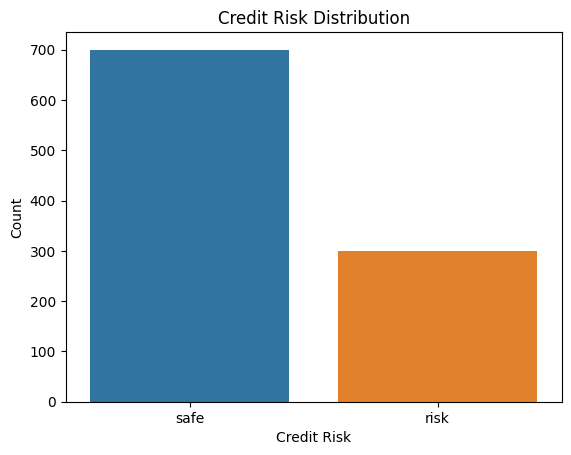

In [47]:
data = {'credit_risk': df_updates['credit_risk']}
df = pd.DataFrame(data)

# Map the credit_risk column
credit_risk_mapping = {0: 'risk', 1: 'safe'}
df['credit_risk'] = df['credit_risk'].map(credit_risk_mapping)

# Create a count plot
sns.countplot(x='credit_risk', data=df)

# Add labels and title
plt.xlabel('Credit Risk')
plt.ylabel('Count')
plt.title('Credit Risk Distribution')

# Show the plot
plt.show()

 70% of the total records have good credit risk and 30% of records have bad credit risk.

# Exploratory Data Analysis

In [48]:
df_updates.columns

Index(['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker', 'credit_risk'],
      dtype='object')

# Now, let's visualize the categorical features of our dataset

In [49]:
categorical_columns=df_updates.columns[df_updates.dtypes=="object"]
numerical_columns=df_updates.columns[df_updates.dtypes!="object"].drop('credit_risk')

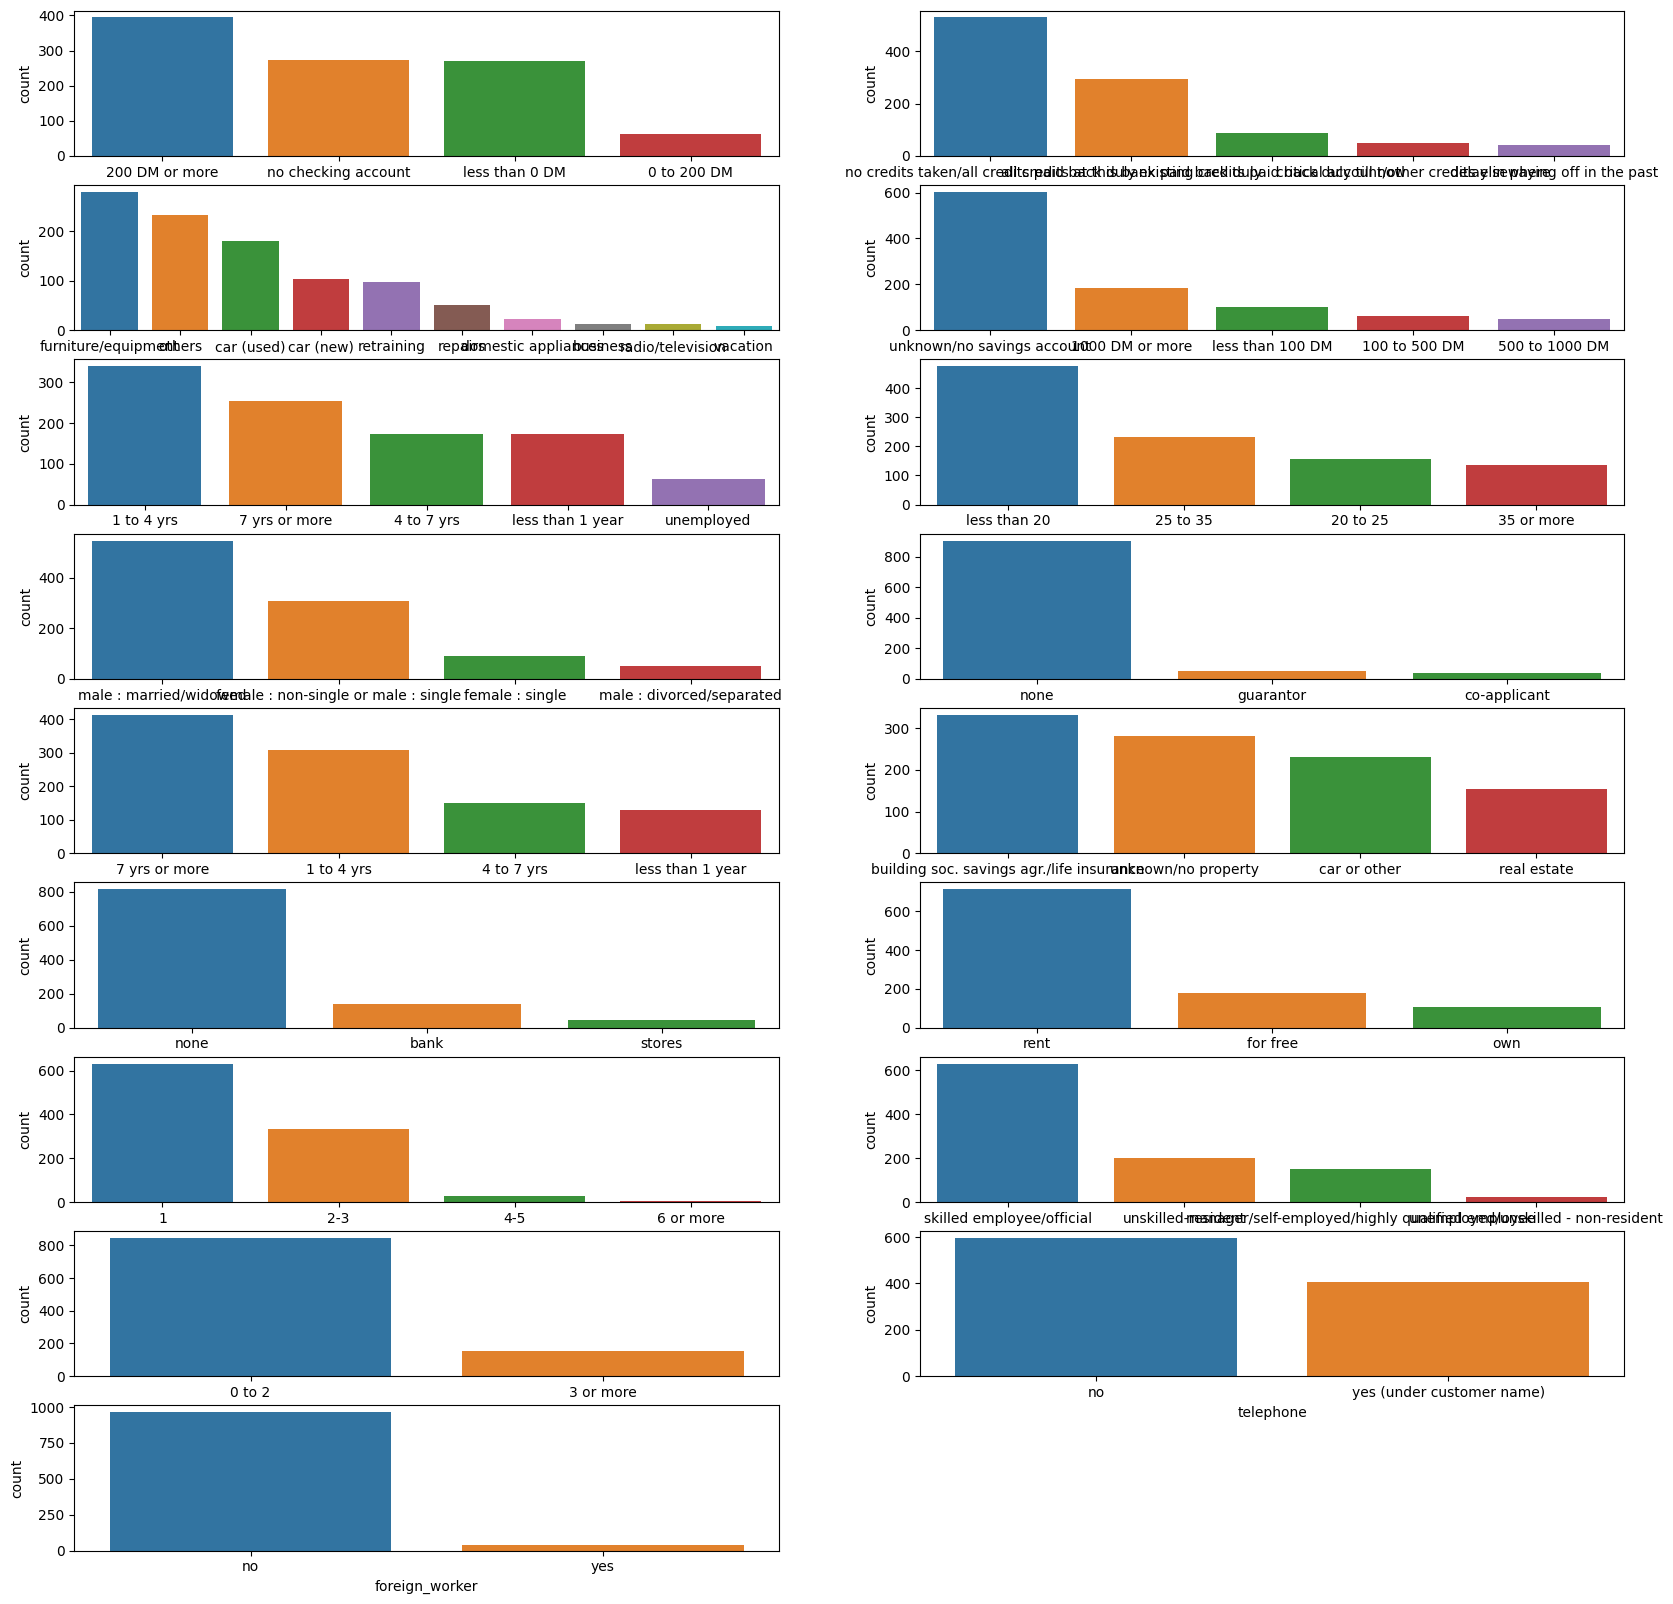

In [50]:
plt.figure(figsize=(20,20))
for idx,columns in enumerate(categorical_columns):
    #fig,ax=plt.subplots(figsize=(20,8))
    plt.subplot(9, 2, idx+1)
    sns.countplot(x=df_updates[columns], order=df_updates[columns].value_counts().index, data=df_updates)

# Let's first visualize the numerical features of our dataset

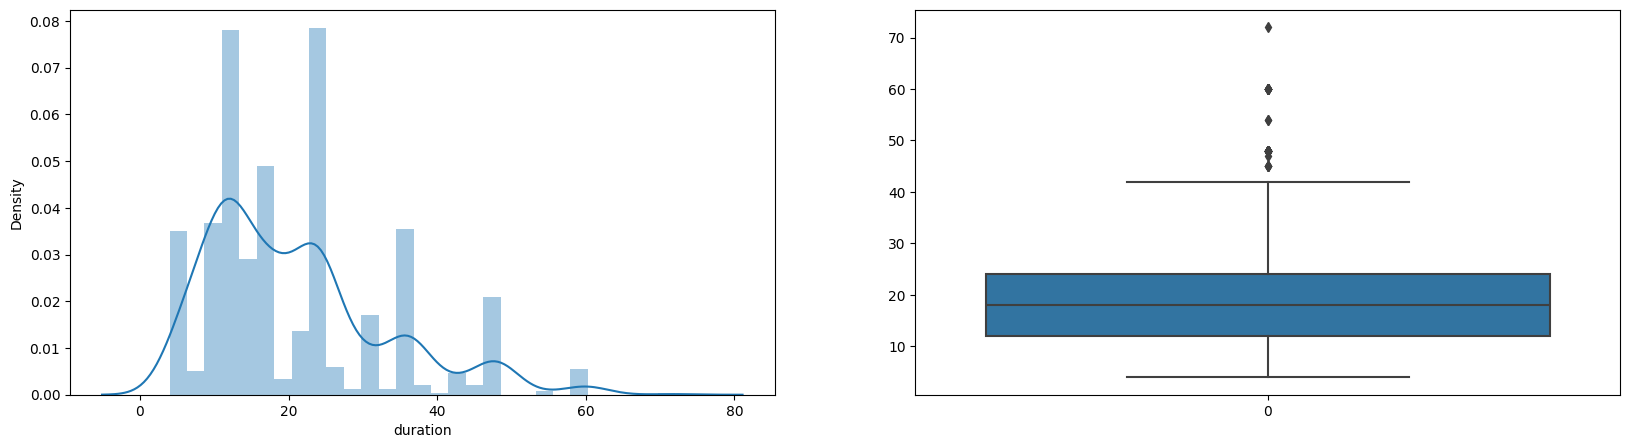

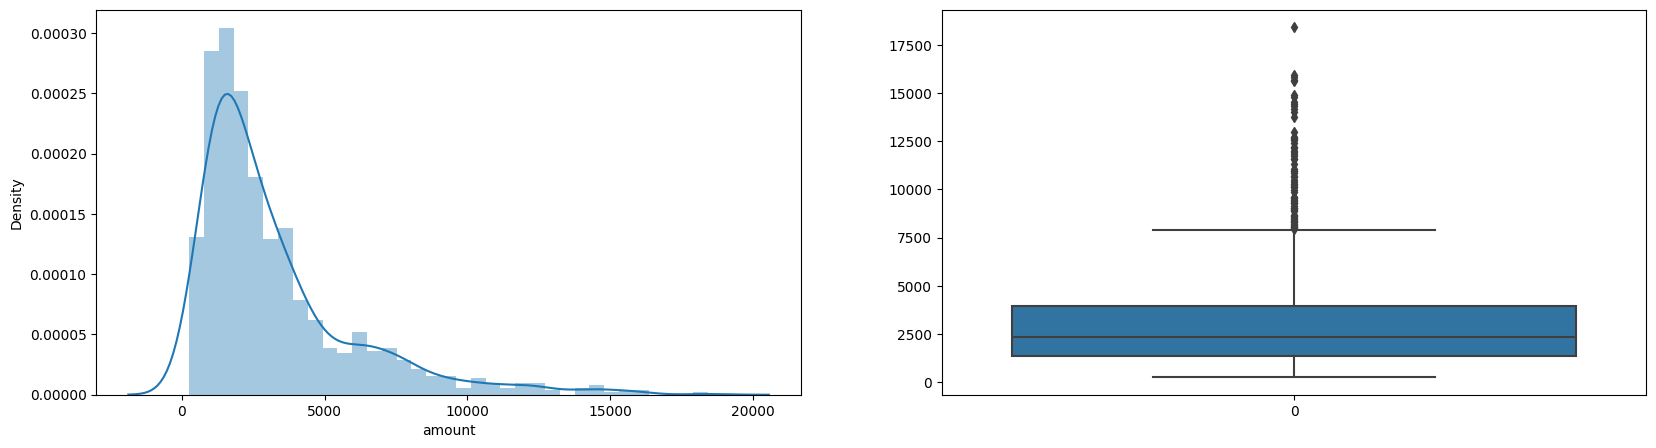

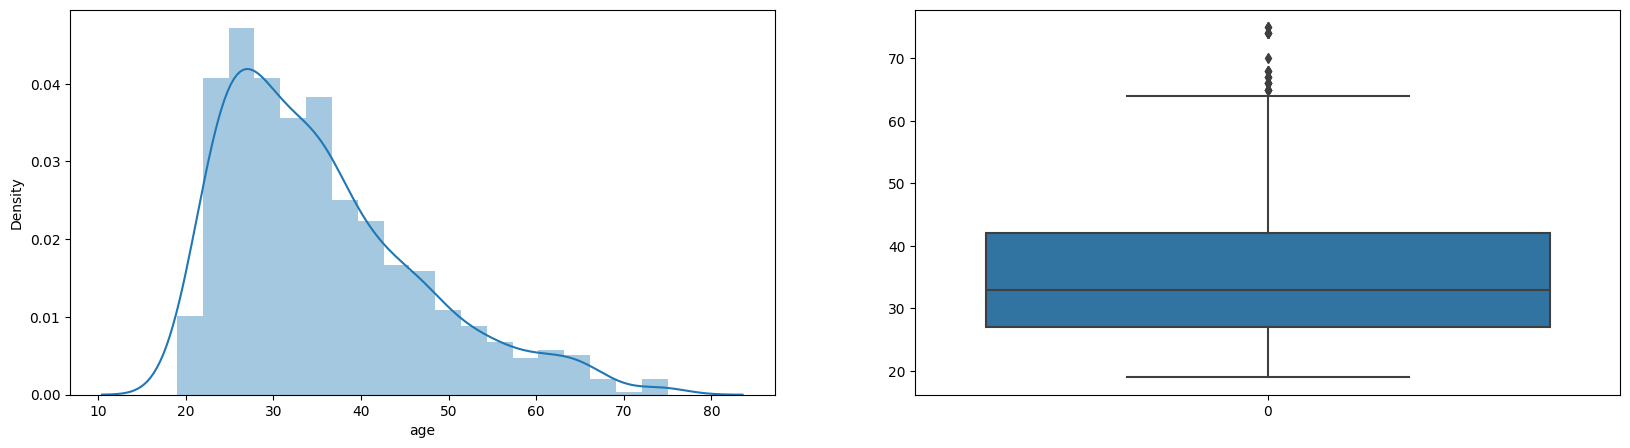

In [51]:
for columns in numerical_columns :
    fig,ax=plt.subplots(1,2,figsize=(20,5))
    sns.distplot(df_updates[columns],ax=ax[0])
    sns.boxplot(df_updates[columns],ax=ax[1])


# Inferences from the graph

- Skewness : we measure the extent of this asymmetry with skewness.

skewness= 3(mean-median)/std dev.


- Positive skewness [Right Skewness] :

The right tail of the distribution is longer or fatter than the left.
The mean is greater than the median, and the mode is less than both mean and median.



- Negative skewness [left-skewed]:

The left tail of the distribution is longer or fatter than the right.
The mean is less than the median, and the mode is greater than both mean and median.

'''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''
In our plots:

Only few outliers in 'duration' column.
Data is right skewed.

Lot of outliers in 'amount' column.
Data is highly right skewed.


Some outliers in 'age' column.
Data is slightly right skewed.

# Lets plot Co-relation of data

In [52]:
df_updates.columns

Index(['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker', 'credit_risk'],
      dtype='object')

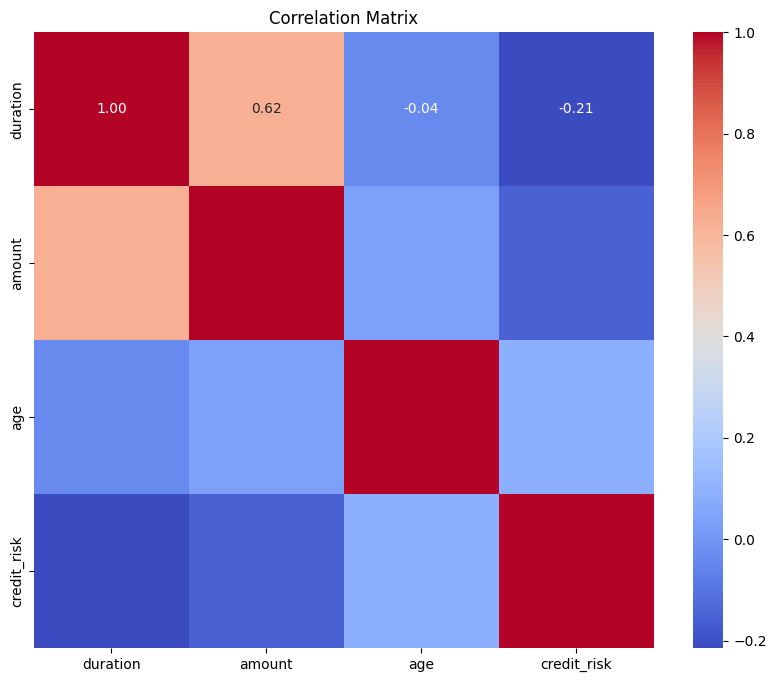

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt





# Select only numeric columns
numeric_df = df_updates.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Add title
plt.title('Correlation Matrix')

# Show the plot
plt.show()


We can see that amout and duration are strongly co-related. The reason is the debtor is not able to pay the loan in short time and the interest on the loan keeps on compounding as the time increases. This also increases in credit_risk

In [54]:
df_updates.columns

Index(['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker', 'credit_risk'],
      dtype='object')

# Bivariate Analysis

# Bivariate analysis of Numerical columns

We are using it to : Measure the strength and direction of the linear relationship between variables.

<Axes: >

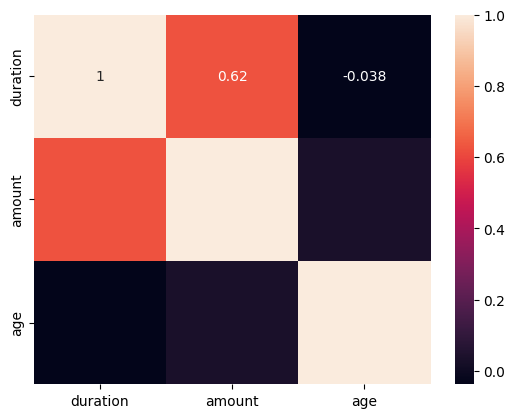

In [55]:
numerical_columns = ['duration','amount','age']
sns.heatmap(df_updates[numerical_columns].corr(), annot=True)

High correlation: duration and amount

All others have no correlation

In [56]:
df_updates.columns

Index(['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker', 'credit_risk'],
      dtype='object')

# Age Group vs. Credit Risk Confirmation

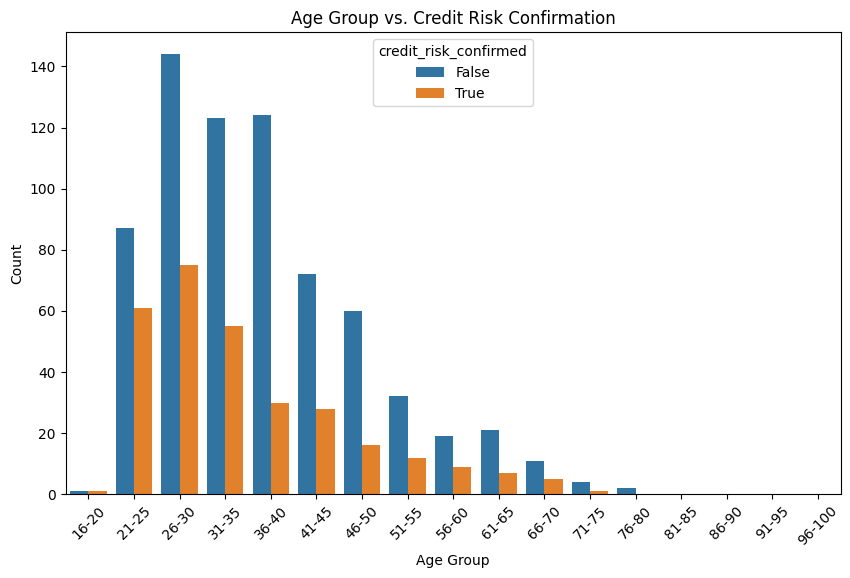

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Create age bins
age_bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
age_labels = ['16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65', '66-70', '71-75', '76-80', '81-85', '86-90', '91-95', '96-100']
df_updates['age_group'] = pd.cut(df_updates['age'], bins=age_bins, labels=age_labels, right=False)

# Filter the DataFrame where credit_risk is confirmed as 0 (meaning "risk")
df_updates['credit_risk_confirmed'] = df_updates['credit_risk'] == 0

# Plot age vs. credit_risk_confirmed
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', hue='credit_risk_confirmed', data=df_updates)
plt.title('Age Group vs. Credit Risk Confirmation')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
# plt.legend([],[], frameon=False)
plt.show()


We can see that here the people of age group of 26-30 has highest credit risk numbers, follwed by of age group 21-25 and 31-35. 
As the age group of 16-20 are still teenagers they usually don't take debt and the people of age more than 75 have good credit_risk this may be becouse of lack of the data points in this population sample or they might be able to repay the loan.

# Duration vs Credit_risk_confirmation

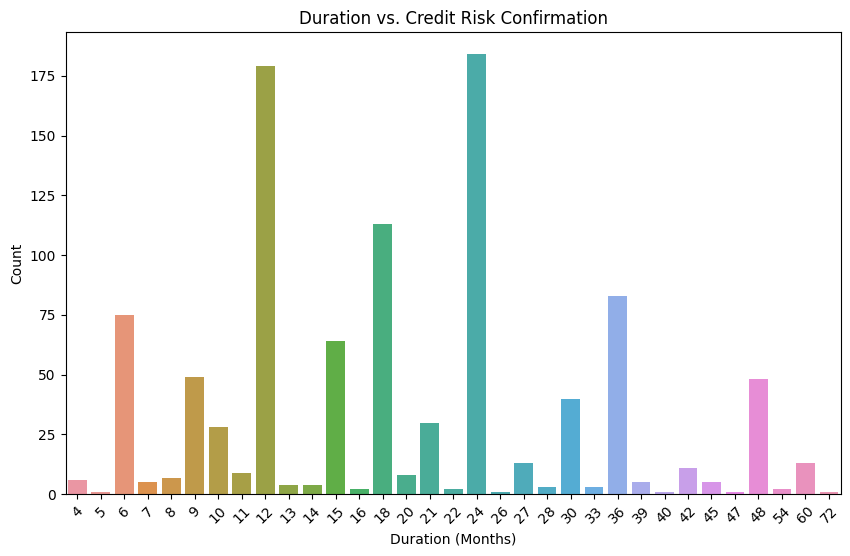

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume df_updates is your DataFrame containing the data

# Create a new column for credit_risk_confirmed
df_updates['credit_risk_confirmed'] = df_updates['credit_risk'] == 0



# Plot duration vs. credit_risk_confirmed
plt.figure(figsize=(10, 6))
sns.countplot(x='duration', data=df_updates)
plt.title('Duration vs. Credit Risk Confirmation')
plt.xlabel('Duration (Months)')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Since we filtered the data to only include True values, no legend is needed
plt.legend([],[], frameon=False)

plt.show()


We can see that the poeple who take loan for 12-24 monts have more credit_risk.

In [59]:
df_updates['credit_risk_confirmed']

0      False
1      False
2      False
3      False
4      False
       ...  
995     True
996     True
997     True
998     True
999     True
Name: credit_risk_confirmed, Length: 1000, dtype: bool

# Amount vs. Credit Risk Confirmation

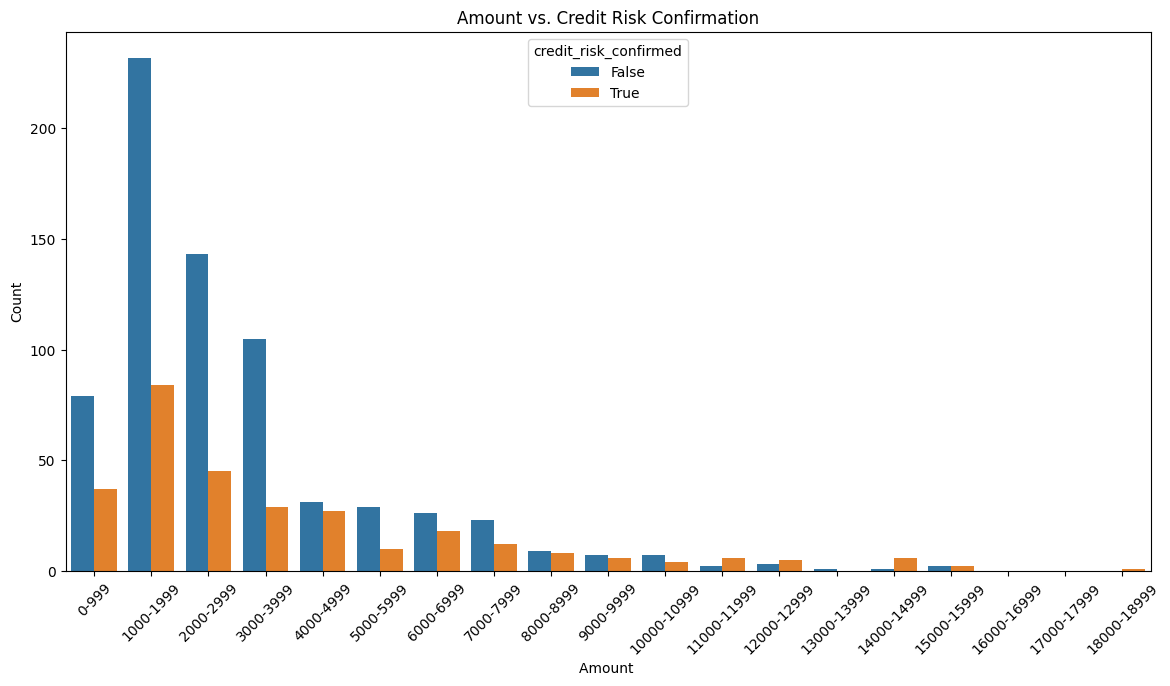

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_updates is your DataFrame containing the data

# Create a new column for credit_risk_confirmed (True for 'credit_risk' == 0)
df_updates['credit_risk_confirmed'] = df_updates['credit_risk'] == 0

# Bin the 'amount' column in intervals of 1000
bins = list(range(0, df_updates['amount'].max() + 1000, 1000))
labels = [f'{i}-{i+999}' for i in bins[:-1]]

df_updates['amount_binned'] = pd.cut(df_updates['amount'], bins=bins, labels=labels, right=False)

# Plot amount vs. credit_risk_confirmed
plt.figure(figsize=(14, 7))
sns.countplot(x='amount_binned', hue='credit_risk_confirmed', data=df_updates)
# plt.legend([],[], frameon=False)
# Set title and labels
plt.title('Amount vs. Credit Risk Confirmation')
plt.xlabel('Amount ')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Display the plot
plt.show()


We can see that the people who took loan of amout 1000-1999 has high credit risk followed by 2000-2999. This may be because most of the population takes loan in this range and go default. 

# Purpose vs. Credit Risk Confirmation

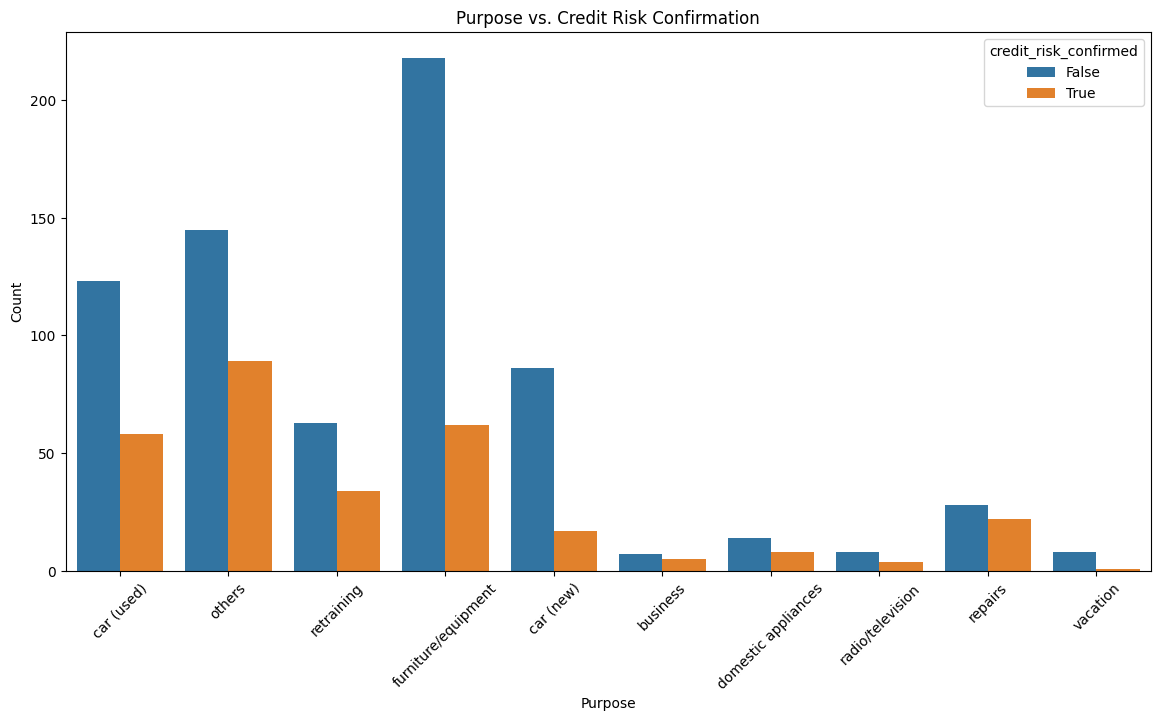

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_updates is your DataFrame containing the data

# Create a new column for credit_risk_confirmed (True for 'credit_risk' == 0)
df_updates['credit_risk_confirmed'] = df_updates['credit_risk'] == 0

# Plot purpose vs. credit_risk_confirmed
plt.figure(figsize=(14, 7))
sns.countplot(x='purpose', hue='credit_risk_confirmed', data=df_updates)

# Set title and labels
plt.title('Purpose vs. Credit Risk Confirmation')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.xticks(rotation=45)
# plt.legend([],[], frameon=False)
# Display the plot
plt.show()


We can see that the people who took loan for  others,used cars and equipments category has more credit_risk. But we can also see that the repair category has very less difference between Paid and unpaid loans.

# foreign_worker vs credit_risk_confirmed

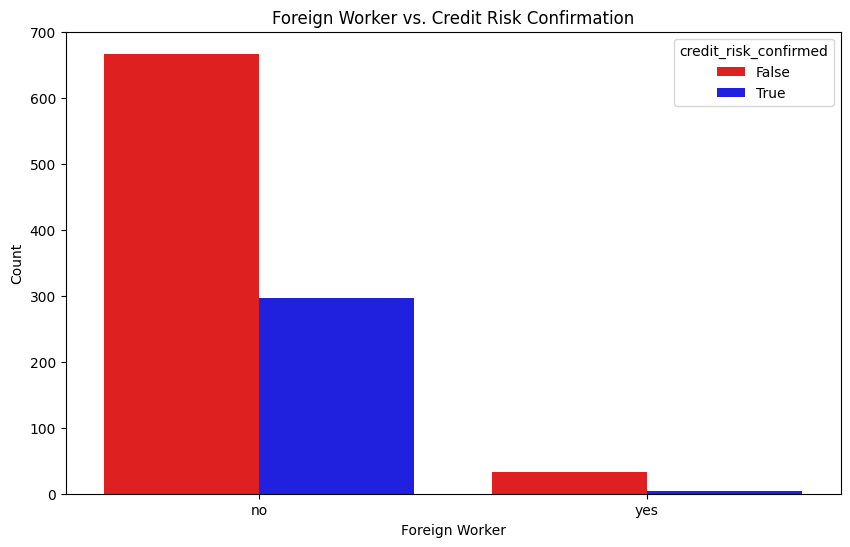

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_updates is your DataFrame containing the data

# Create a new column for credit_risk_confirmed (True for 'credit_risk' == 0)
df_updates['credit_risk_confirmed'] = df_updates['credit_risk'] == 0

# Map binary values to readable labels
df_updates['foreign_worker_label'] = df_updates['foreign_worker']

# Plot foreign_worker vs. credit_risk_confirmed
plt.figure(figsize=(10, 6))
sns.countplot(x='foreign_worker_label', hue='credit_risk_confirmed', data=df_updates, palette={True: "blue", False: "red"})


# Set title and labels
plt.title('Foreign Worker vs. Credit Risk Confirmation')
plt.xlabel('Foreign Worker')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Display the plot
plt.show()


From the above plot we can see that forigen_workers are less riskier to give loans compared to native citizens. This might be due to foreigners usually dont take loans in foreigns.

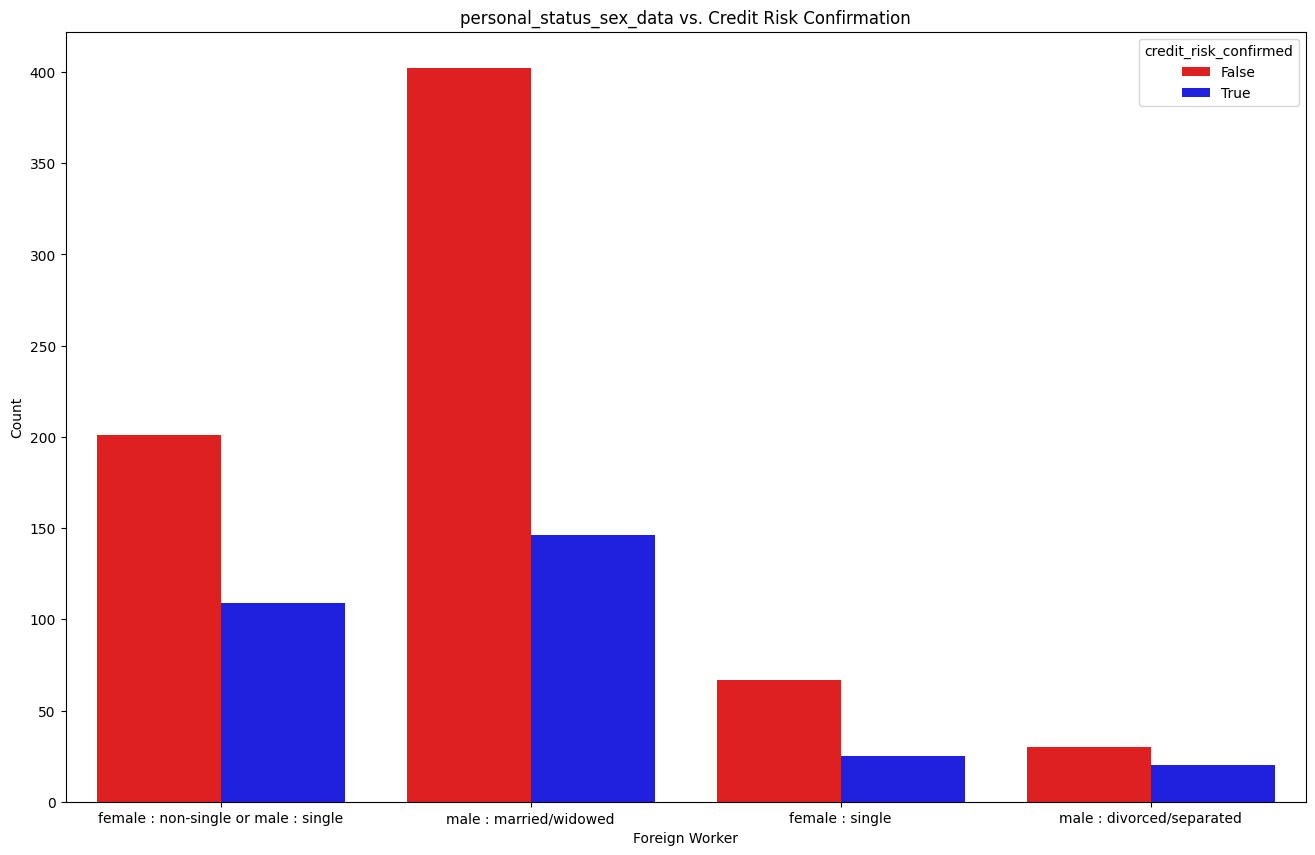

In [63]:
# Create a new column for credit_risk_confirmed (True for 'credit_risk' == 0)
df_updates['credit_risk_confirmed'] = df_updates['credit_risk'] == 0

# Map binary values to readable labels
df_updates['personal_status_sex_data'] = df_updates['personal_status_sex']

# Plot foreign_worker vs. credit_risk_confirmed
plt.figure(figsize=(16, 10))
sns.countplot(x='personal_status_sex_data', hue='credit_risk_confirmed', data=df_updates, palette={True: "blue", False: "red"})


# Set title and labels
plt.title('personal_status_sex_data vs. Credit Risk Confirmation')
plt.xlabel('Foreign Worker')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Display the plot
plt.show()

From above plot, we get to know that the male: married/widowed has more credit_risk confirmend and also has high number of paid loans. This may be due to the the population on this category of taking loan is more and also paying loans is also more.
 We  see that the ration of taken loans and paid loans is very small in the category of male:divorced/separated. This may be because the data of this category is less to conclude and the male after divorce need to pay alimony, we can also include paying alimony may also influence the Loan repayment.

# housing vs. Credit Risk Confirmation

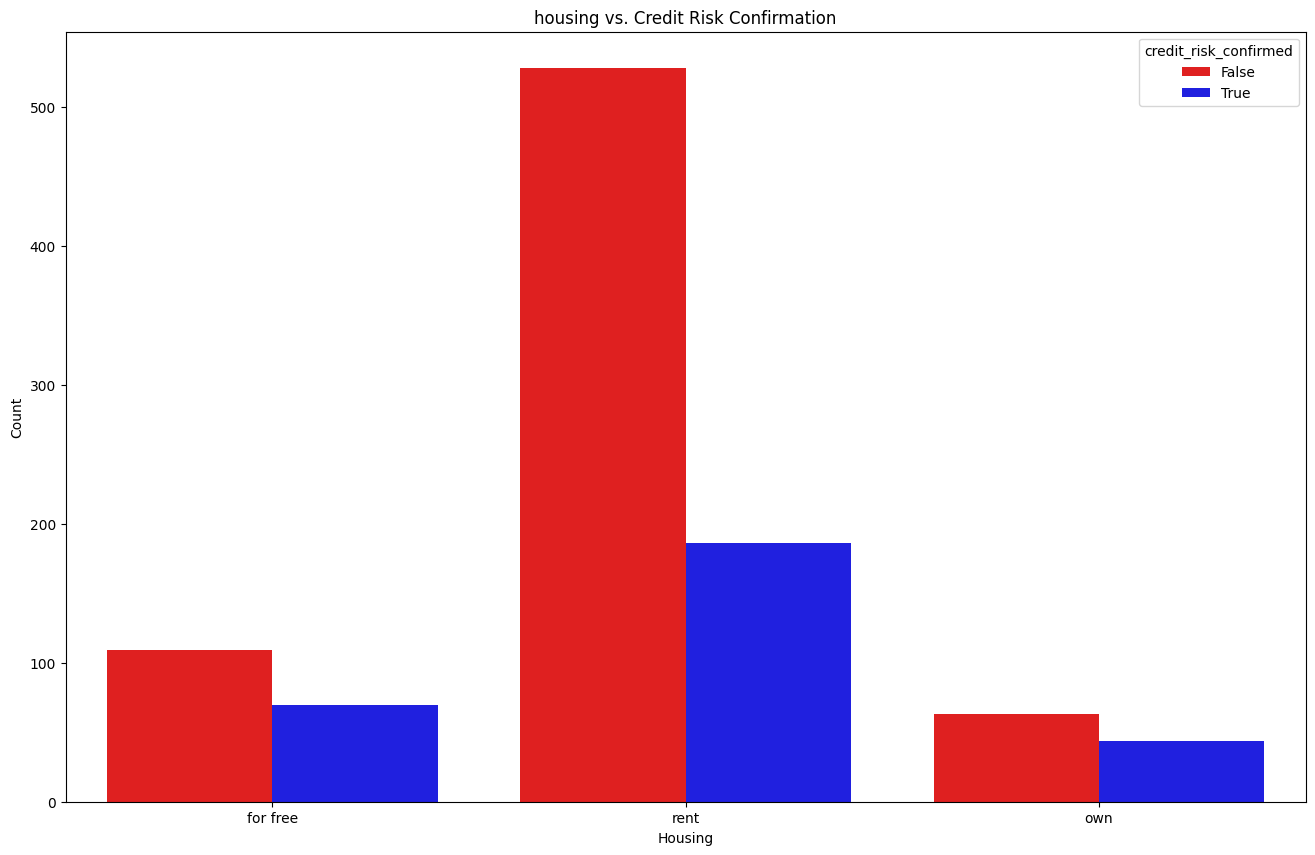

In [64]:
# Create a new column for credit_risk_confirmed (True for 'credit_risk' == 0)
df_updates['credit_risk_confirmed'] = df_updates['credit_risk'] == 0

# Map binary values to readable labels
df_updates['housing_data'] = df_updates['housing']

# Plot foreign_worker vs. credit_risk_confirmed
plt.figure(figsize=(16, 10))
sns.countplot(x='housing_data', hue='credit_risk_confirmed', data=df_updates, palette={True: "blue", False: "red"})


# Set title and labels
plt.title('housing vs. Credit Risk Confirmation')
plt.xlabel('Housing')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Display the plot
plt.show()

From above plot we observe that the people living in the rented home are more and the the most of the loan is takin by them and also this population have more credit risk. This may be because the data contains the population who stays in rent are more.

The people who have own house may be because they might have borrowed loan to purchase new house and we also see that ratio of loan taking and loan repayment is less in the 'own' category.

In [65]:
df_updates.columns

Index(['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker', 'credit_risk',
       'age_group', 'credit_risk_confirmed', 'amount_binned',
       'foreign_worker_label', 'personal_status_sex_data', 'housing_data'],
      dtype='object')

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vf = [vif(df_updates[numerical_columns].values, i ) for i in range(df_updates[numerical_columns].shape[1])]
pd.DataFrame(vf, index=numerical_columns, columns= ["vif"])

,vif
duration,5.532347
amount,3.862073
age,3.064870


# Applying Chi-Square Contingency Test on categorical features to check their significance

- Chi-square: a statistical test used to determine whether there is a significant association or independence between two categorical variables.

- Relationship to Data
Chi-Square Values: Quantify the difference between observed and expected frequencies in categorical data.
P-Values: Indicate the probability of observing the data if the null hypothesis is true. A low p-value suggests that the observed data is unlikely under the null hypothesis, leading to its rejection.

- Highly Significant Features:
Status: With a chi-square statistic of 123.72 and a p-value of 1.22 , this feature is highly significant.
Credit History: Chi-square statistic of 61.69 and a p-value of 1.28. 
Purpose: Chi-square statistic of 33.36 and a p-value of 1.16.

- Moderately Significant Features:
Employment Duration: Chi-square statistic of 18.37 and a p-value of 1.05.
Other Installment Plans: Chi-square statistic of 12.84 and a p-value of 1.63.

- Non-Significant Features:
Present Residence: Chi-square statistic of 0.75 and a p-value of 0.86.
Job: Chi-square statistic of 1.89 and a p-value of 0.60.

In [67]:
logger.info('Applying chi-square methods')

In [68]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming df_updates is your DataFrame containing the data

# Create a list to store the results
chi2_results_list = []

# List of categorical features
categorical_features = [
    'status', 'credit_history', 'purpose', 'savings', 'employment_duration',
    'personal_status_sex', 'other_debtors', 'present_residence', 'property',
    'other_installment_plans', 'housing', 'job', 'people_liable', 'telephone', 'foreign_worker'
]


def contingency_table(feature):
    p = pd.crosstab(df_updates['credit_risk'],df_updates[feature])
    return(p)
feature = []
pval = []
chi2_result = []

for i in categorical_features:
    feature.append(i)
    result = chi2_contingency(contingency_table(i))
    pval.append(round(float(result[1]),6))

    if float(result[1]) < 0.05:
        chi2_result.append("Significant")
    else:
        chi2_result.append("Insignificant")

In [69]:
chisquare = pd.DataFrame(data={'PValue':pval,'Result':chi2_result},index=feature)
chisquare

,PValue,Result
status,0.000000,Significant
credit_history,0.000000,Significant
purpose,0.000116,Significant
savings,0.000000,Significant
employment_duration,0.001045,Significant
personal_status_sex,0.022238,Significant
other_debtors,0.036056,Significant
present_residence,0.861552,Insignificant
property,0.000029,Significant
other_installment_plans,0.001629,Significant


We got the data of significant and Insignificant of the dataset

In [70]:
df_updates.columns


Index(['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker', 'credit_risk',
       'age_group', 'credit_risk_confirmed', 'amount_binned',
       'foreign_worker_label', 'personal_status_sex_data', 'housing_data'],
      dtype='object')

In [71]:
df_updates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   status                    1000 non-null   object  
 1   duration                  1000 non-null   int64   
 2   credit_history            1000 non-null   object  
 3   purpose                   1000 non-null   object  
 4   amount                    1000 non-null   int64   
 5   savings                   1000 non-null   object  
 6   employment_duration       1000 non-null   object  
 7   installment_rate          1000 non-null   object  
 8   personal_status_sex       1000 non-null   object  
 9   other_debtors             1000 non-null   object  
 10  present_residence         1000 non-null   object  
 11  property                  1000 non-null   object  
 12  age                       1000 non-null   int64   
 13  other_installment_plans   1000 non-null   object 

In [72]:
df_frame=pd.read_csv(r"C:\Users\ravit\Desktop\final one\Dataset\German_credit.csv")
# Changing the Columns Name, if already replaced ignore it.
columns =['status','duration','credit_history','purpose','amount','savings','employment_duration',
          'installment_rate','personal_status_sex','other_debtors','present_residence','property',
          'age','other_installment_plans','housing','number_credits','job','people_liable','telephone',
          'foreign_worker','credit_risk']
df_frame.columns = columns
df_frame.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1
